In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\Battery_Analysis1


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from src.model_fitting import fit_and_plot_cycle
from src.plotting import plot_scatterplot, plot_fitted, print_fitted_params, plot_cost
from src.file_loader import load_csv_files
from src.model_fitting import fit_and_plot_cycle


In [4]:
# List of file names
file_names = [
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (2).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (2).csv'
]

dataframes = load_csv_files(file_names, '')

# Display the first 5 rows of each DataFrame
for key, df in dataframes.items():
    print(f"Head of DataFrame {key}:")
    print(df.head(5))
    print("\n")

Head of DataFrame 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_1_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A             Data Source
0        12:25:10.456  0.7850168  CH1   3.25  6.752  High to low_80 deg C_4
1        12:25:10.688  1.0167013  CH1  3.257  6.752  High to low_80 deg C_4
2        12:25:10.918  1.2468257  CH1  3.262  6.752  High to low_80 deg C_4
3        12:25:11.163   1.492032  CH1  3.264  6.752  High to low_80 deg C_4
4        12:25:11.395  1.7237525  CH1  3.265  6.752  High to low_80 deg C_4


Head of DataFrame 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_2_csv:
  Time (HH:mm:ss.SSS)    Channel   CH      V      A             Data Source
0        13:55:18.268  0.7899947  CH1  3.197  6.752  High to low_80 deg C_4
1        13:55:18.498  1.0197068  CH1  3.205  6.752  High to low_80 deg C_4
2        13:55:18.728  1.2500201  CH1  3.211  6.752  High to low_80 deg C_4
3        13:55:18.977  1.4984429

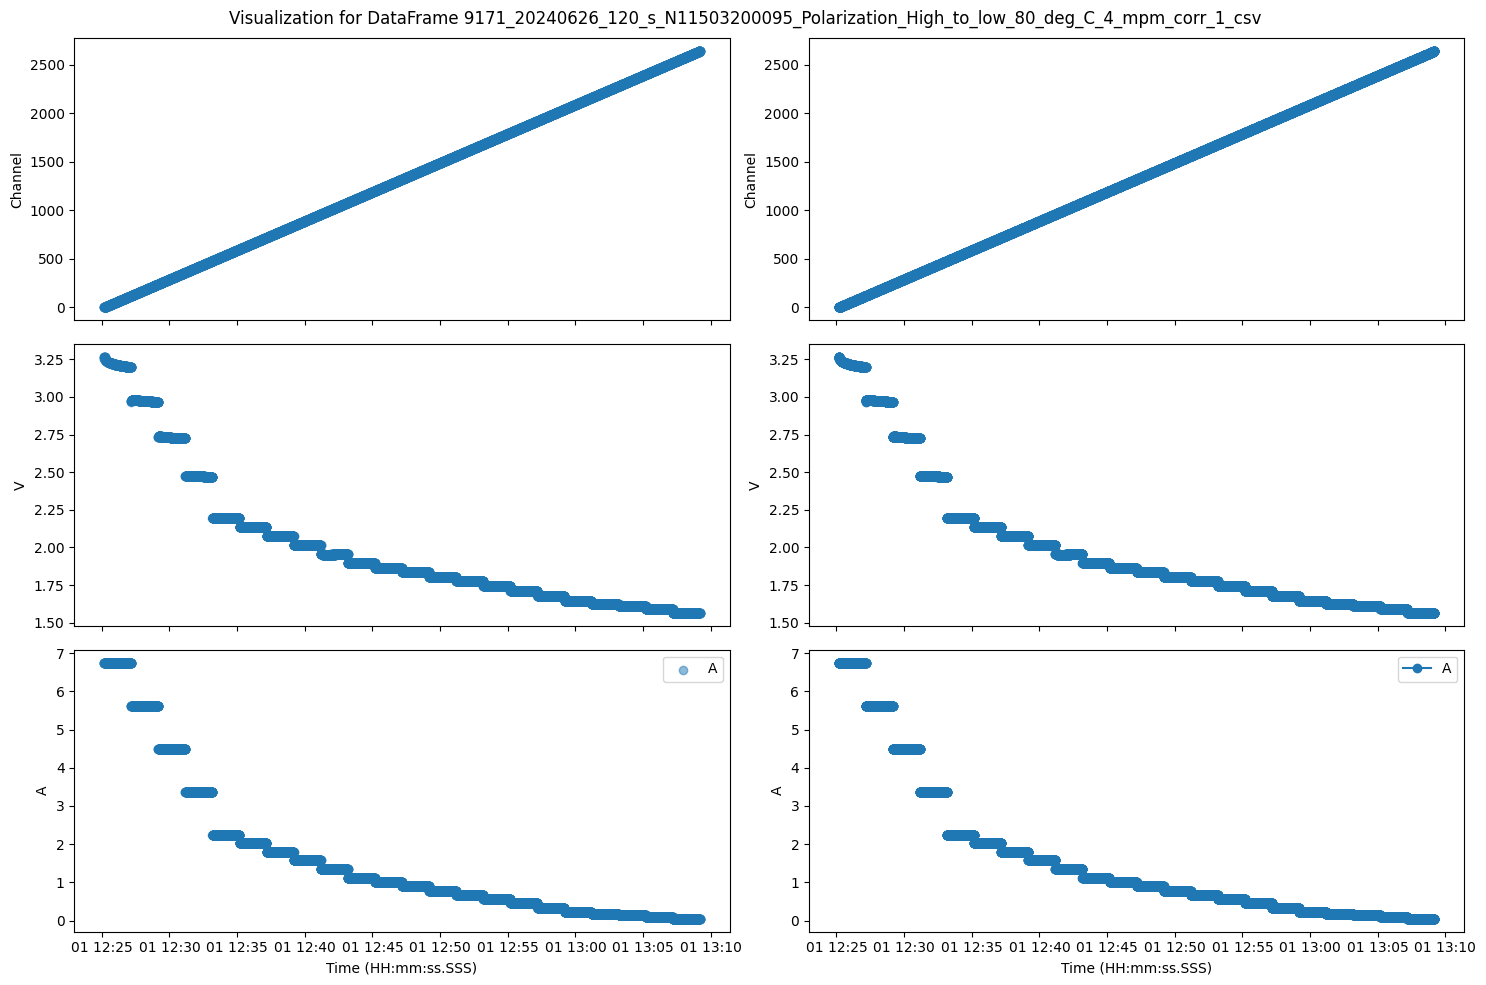

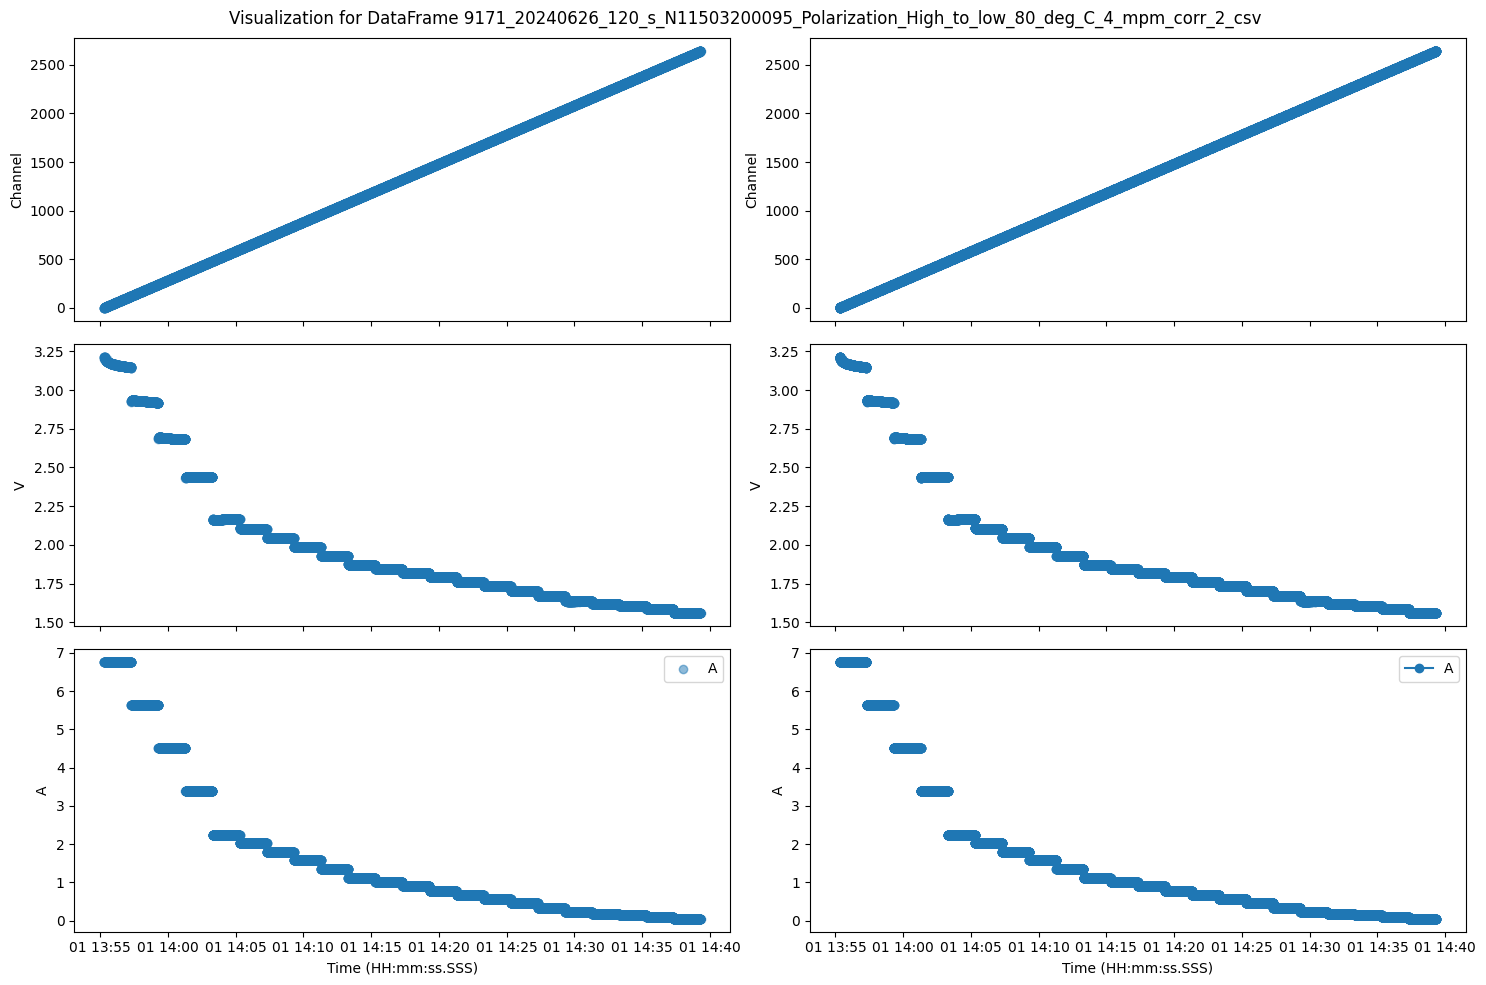

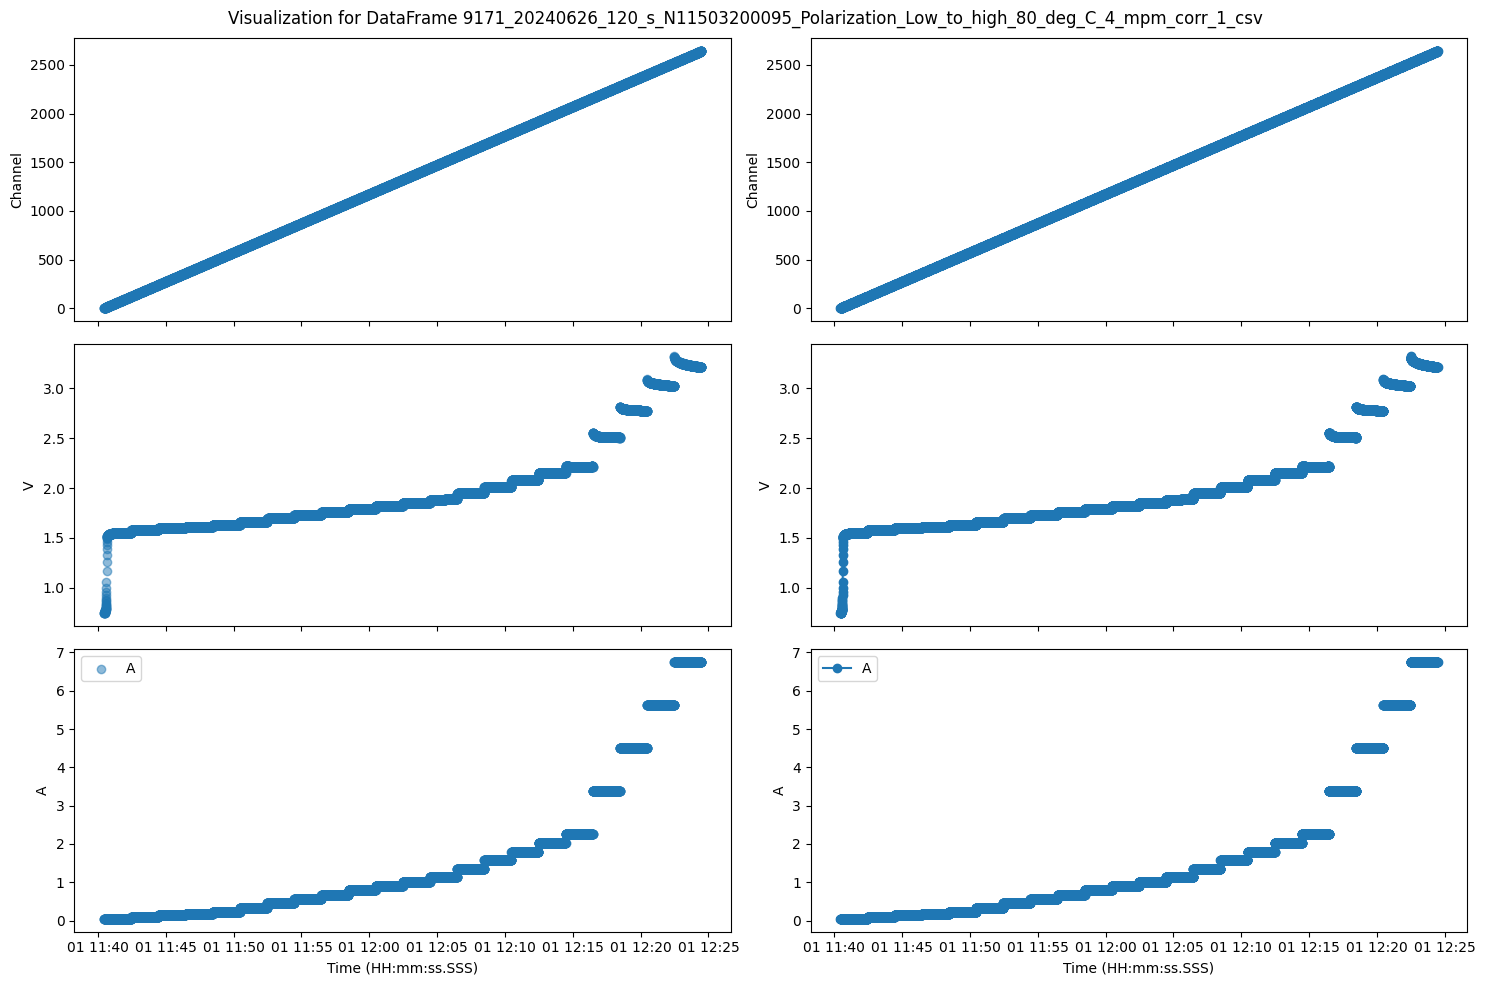

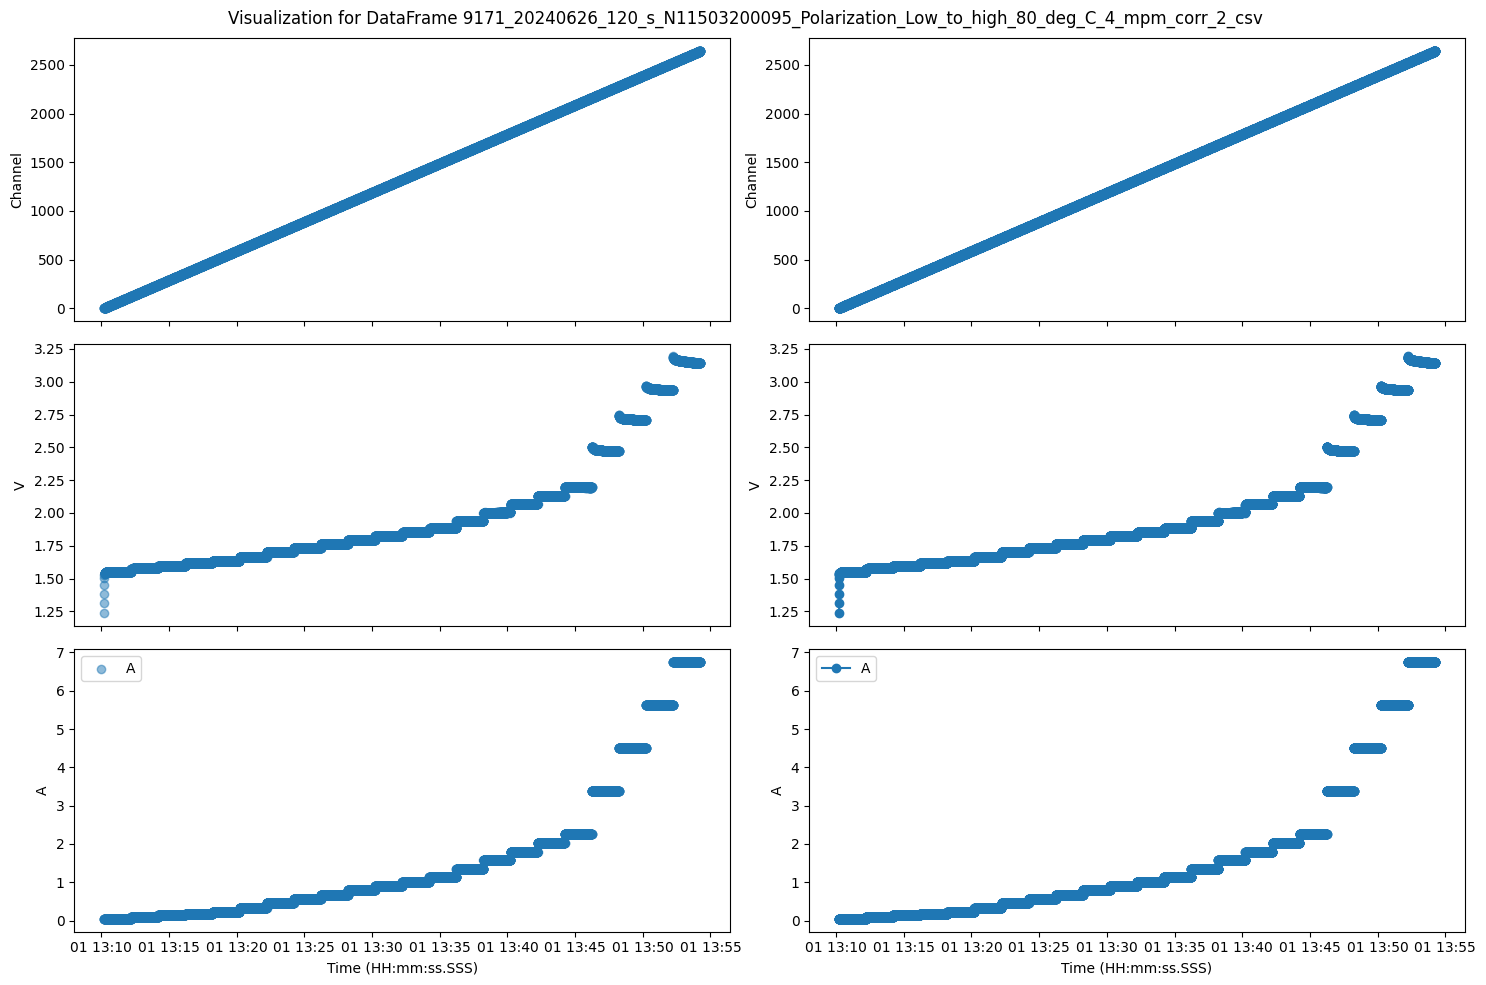

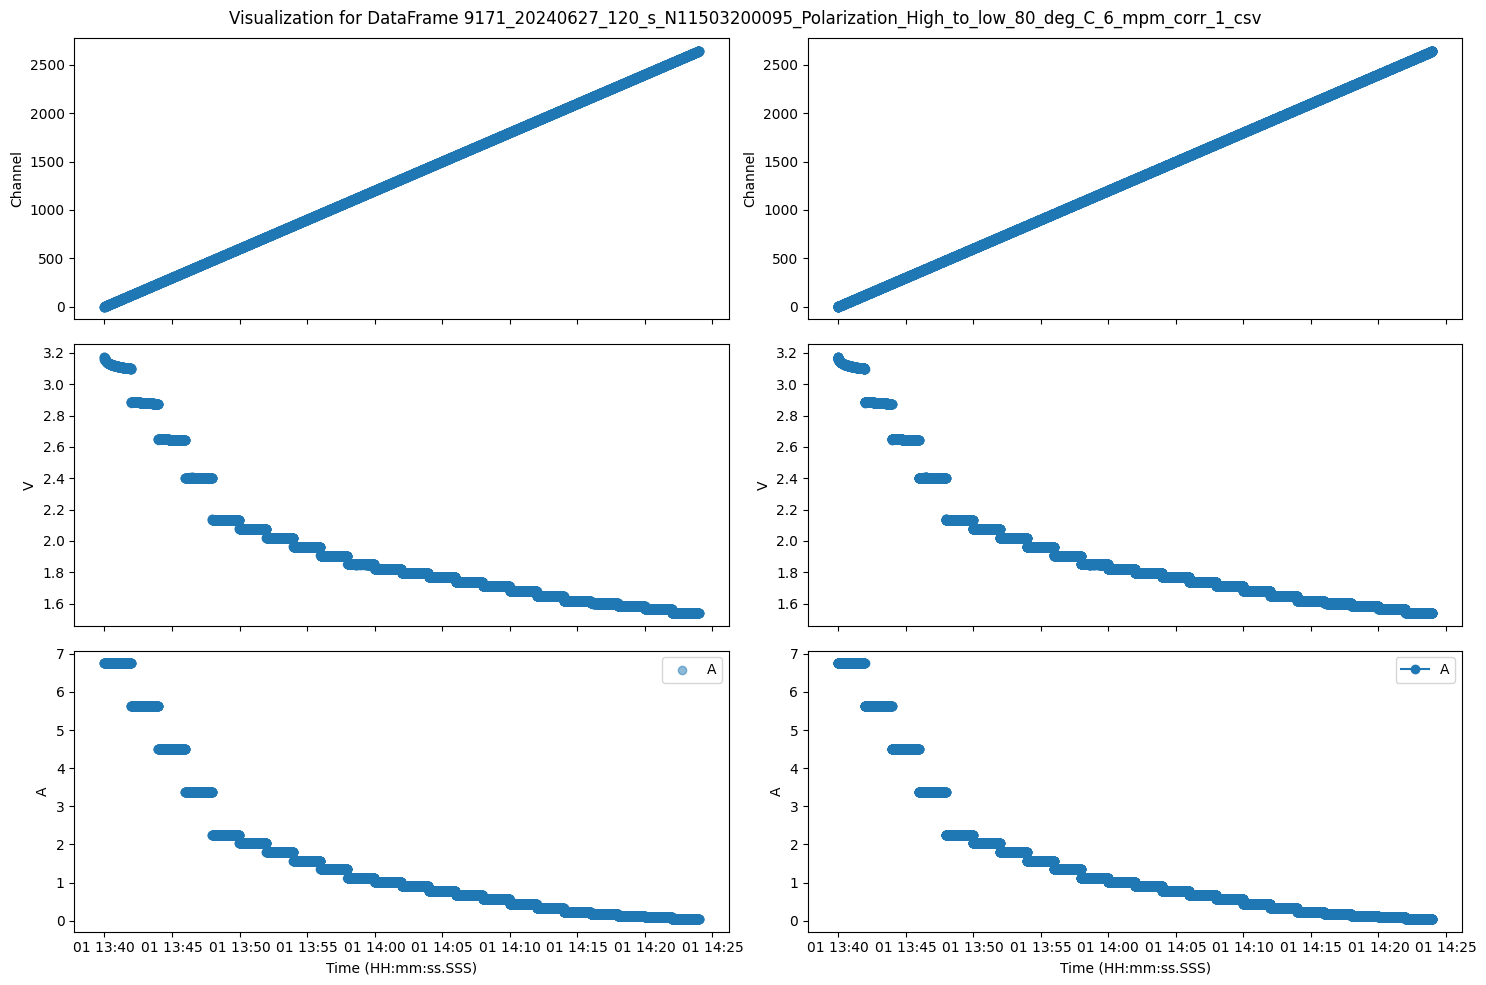

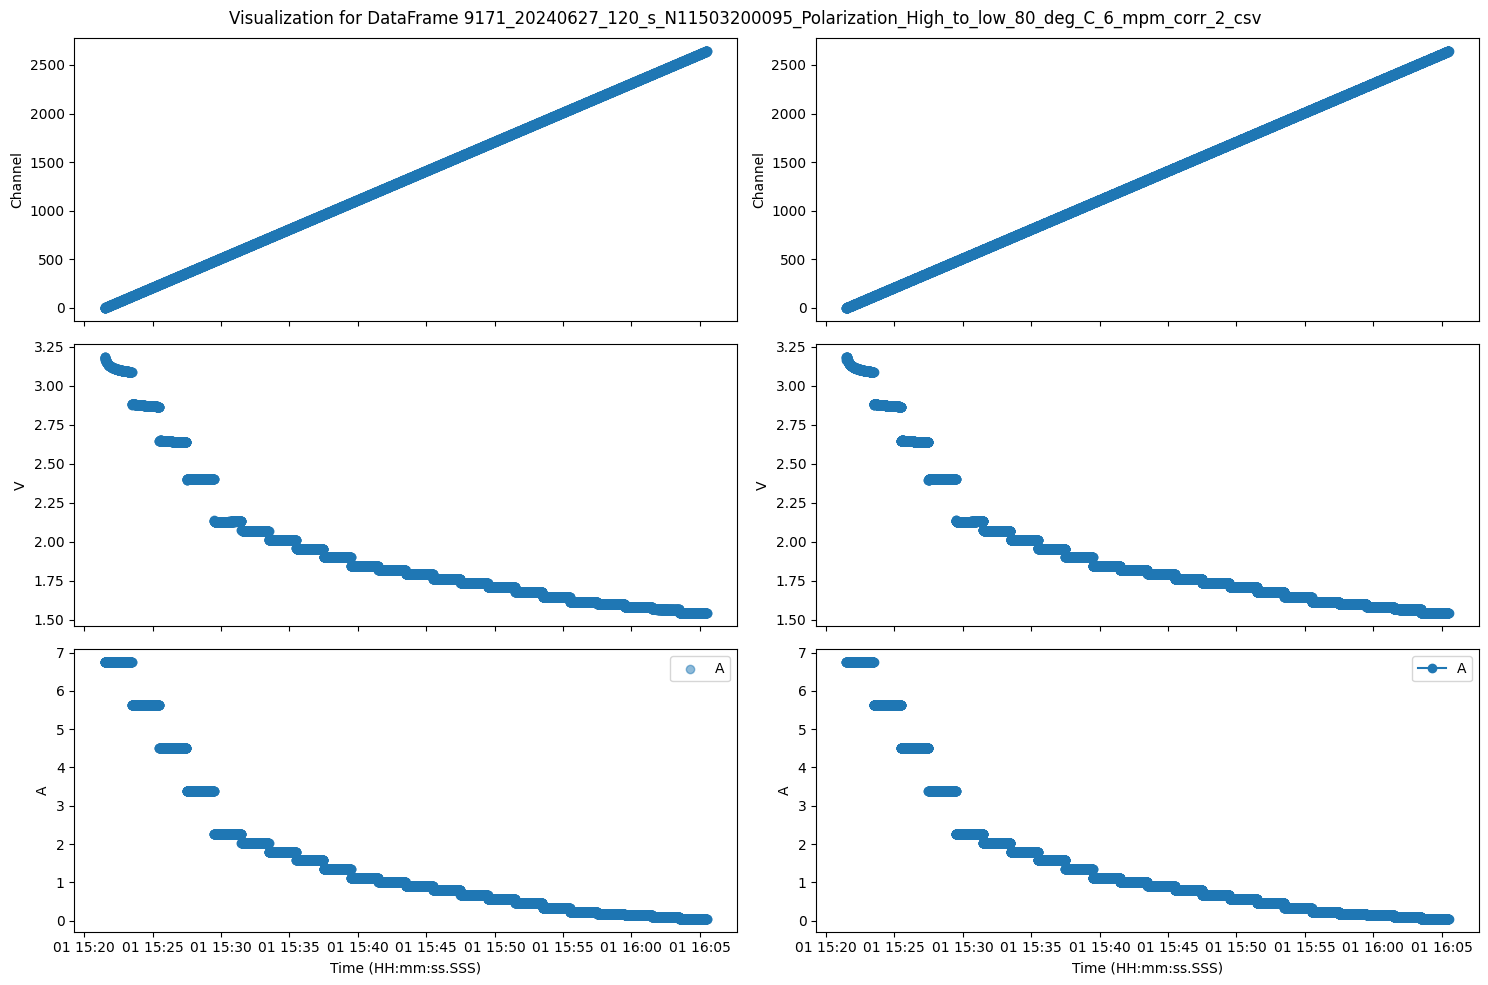

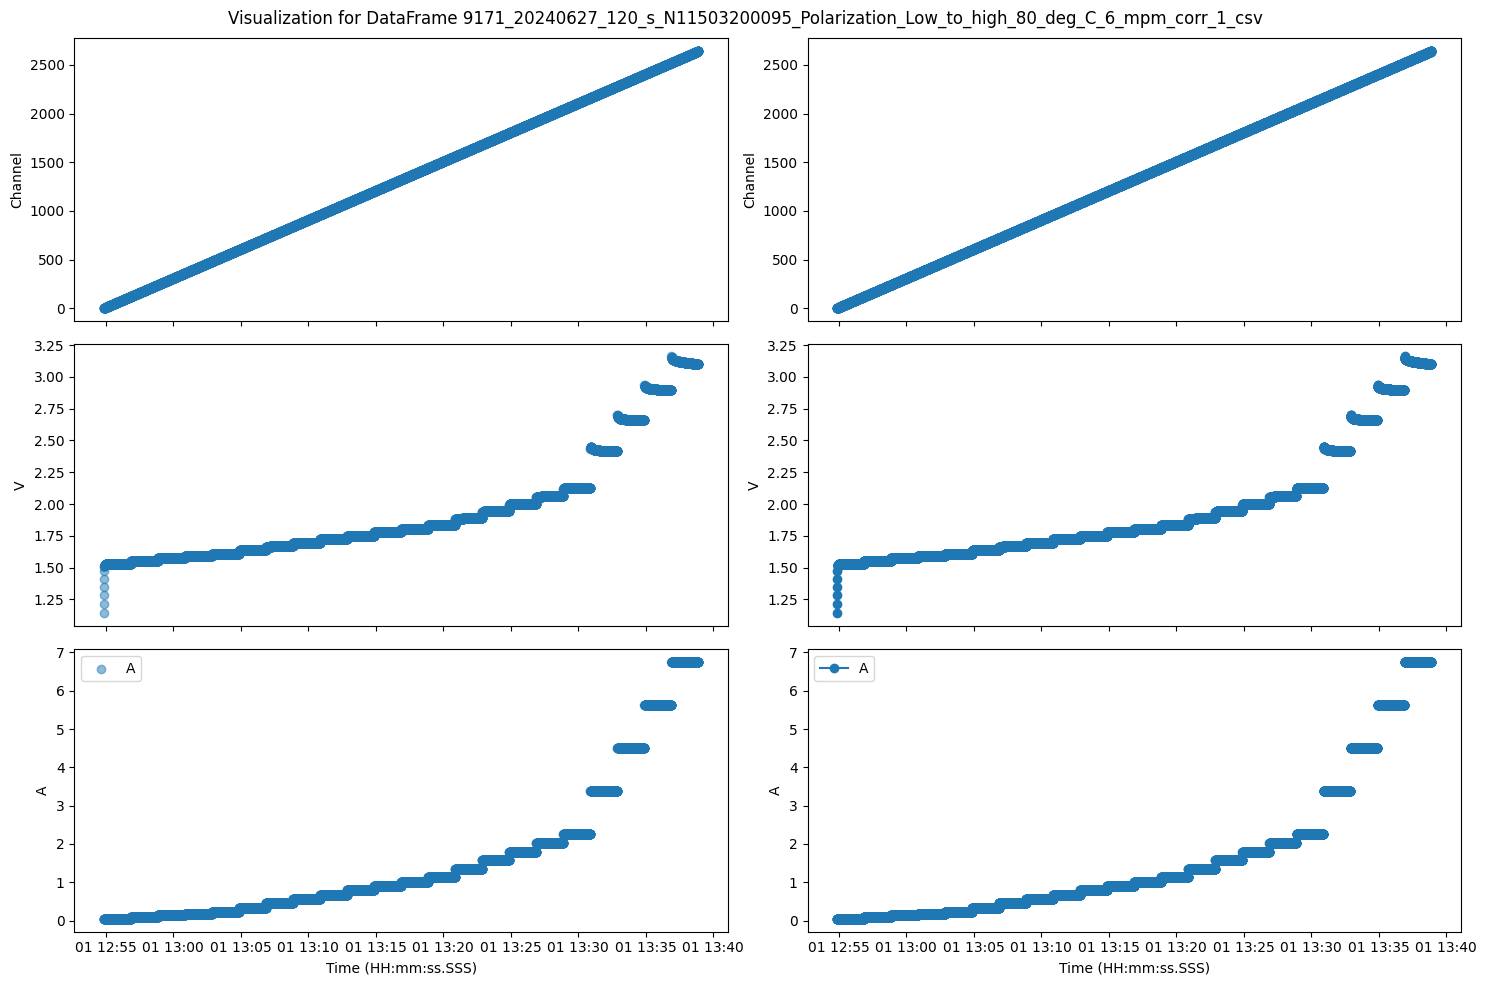

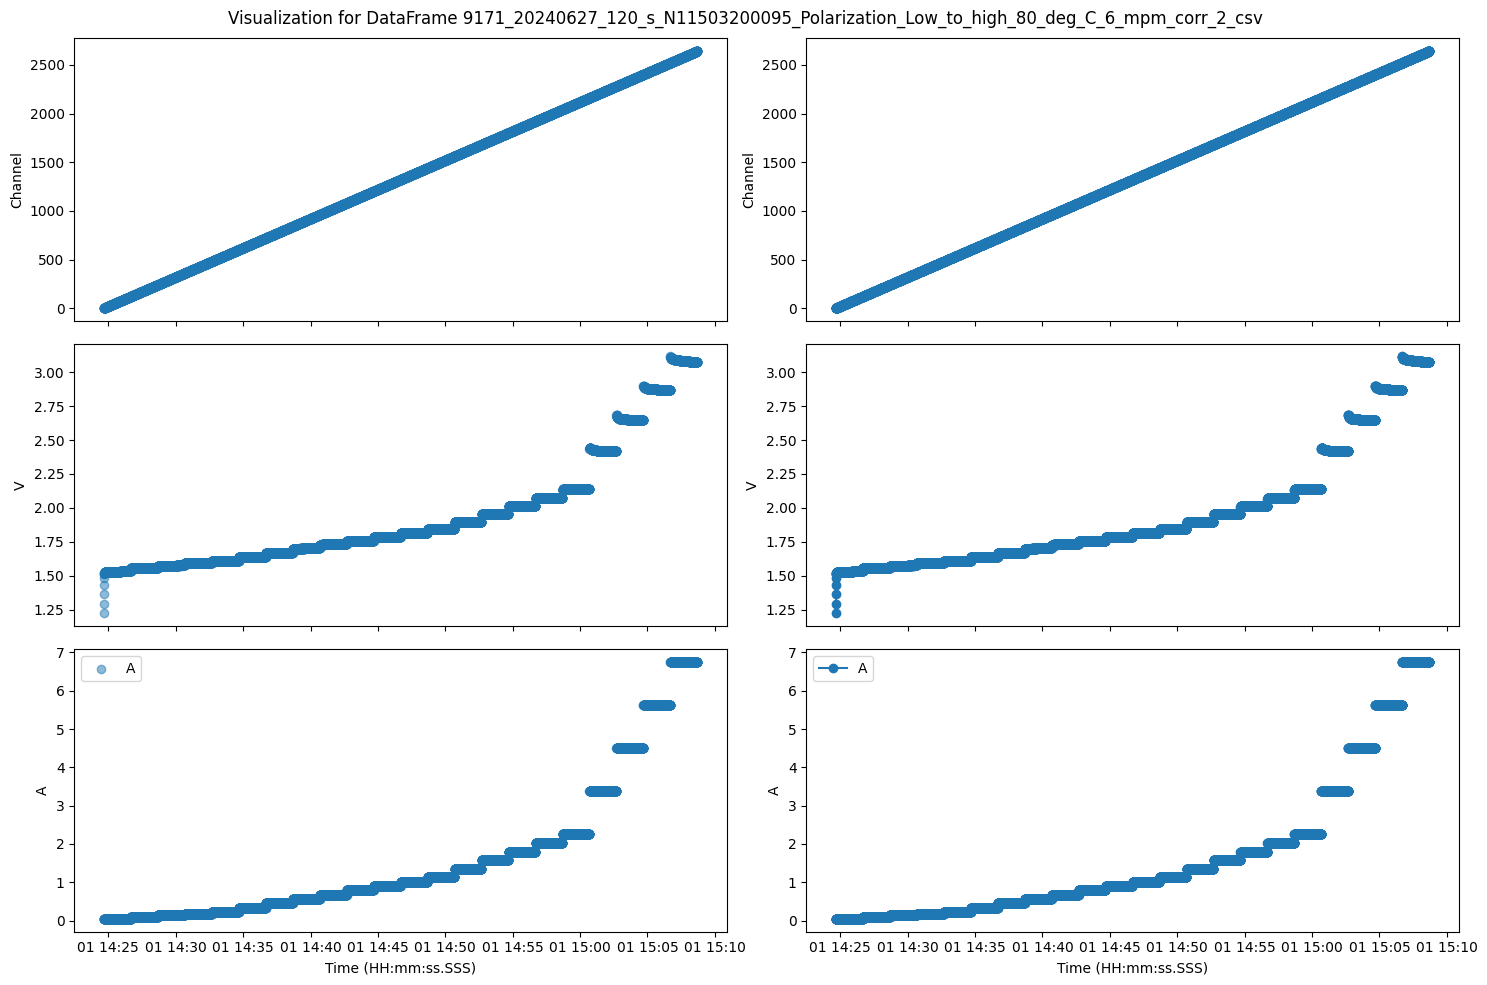

In [5]:
# Create plots for each DataFrame
for key, df in dataframes.items():
    # Convert 'Time (HH:mm:ss.SSS)' to datetime with explicit format
    df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True)
    fig.suptitle(f"Visualization for DataFrame {key}")
    
    # Scatter plots
    axs[0, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['Channel'], label='Channel', alpha=0.5)
    axs[1, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['V'], label='V', alpha=0.5)
    axs[2, 0].scatter(df['Time (HH:mm:ss.SSS)'], df['A'], label='A', alpha=0.5)
    
    # Line plots
    axs[0, 1].plot(df['Time (HH:mm:ss.SSS)'], df['Channel'], label='Channel', marker='o')
    axs[1, 1].plot(df['Time (HH:mm:ss.SSS)'], df['V'], label='V', marker='o')
    axs[2, 1].plot(df['Time (HH:mm:ss.SSS)'], df['A'], label='A', marker='o')
    
    # Set Y-axis labels for scatter plots
    axs[0, 0].set_ylabel('Channel')
    axs[1, 0].set_ylabel('V')
    axs[2, 0].set_ylabel('A')
    
    # Set Y-axis labels for line plots
    axs[0, 1].set_ylabel('Channel')
    axs[1, 1].set_ylabel('V')
    axs[2, 1].set_ylabel('A')
    
    # X-axis label and legend for scatter plots
    axs[2, 0].set_xlabel('Time (HH:mm:ss.SSS)')
    axs[2, 0].legend()
    
    # X-axis label and legend for line plots
    axs[2, 1].set_xlabel('Time (HH:mm:ss.SSS)')
    axs[2, 1].legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


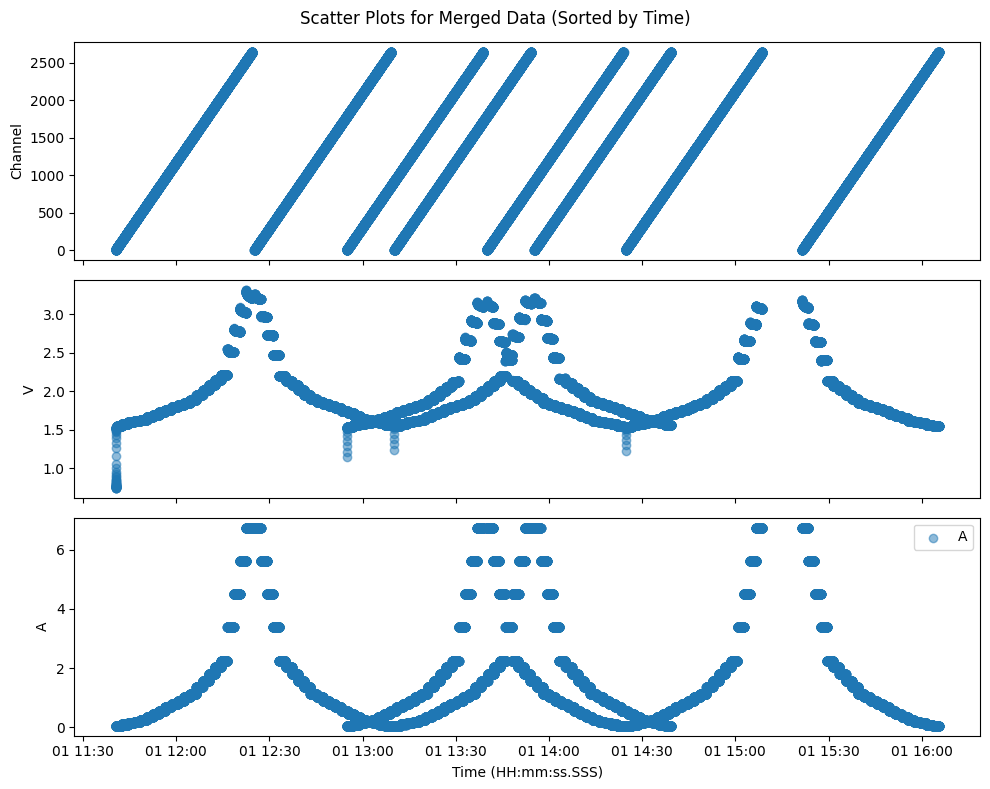

In [6]:
# Merge all DataFrames into one
merged_df = pd.concat(dataframes.values(), ignore_index=True)

# Convert 'Time (HH:mm:ss.SSS)' to datetime if it's not already
merged_df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(merged_df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')

# Sort by 'Time (HH:mm:ss.SSS)'
merged_df.sort_values(by='Time (HH:mm:ss.SSS)', inplace=True)

# Plotting setup
fig, axs = plt.subplots(nrows=3, figsize=(10, 8), sharex=True)
fig.suptitle('Scatter Plots for Merged Data (Sorted by Time)')

# Scatter plots for Channel, V, and A
axs[0].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['Channel'], label='Channel', alpha=0.5)
axs[1].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['V'], label='V', alpha=0.5)
axs[2].scatter(merged_df['Time (HH:mm:ss.SSS)'], merged_df['A'], label='A', alpha=0.5)

# Set Y-axis labels
axs[0].set_ylabel('Channel')
axs[1].set_ylabel('V')
axs[2].set_ylabel('A')

# X-axis label and legend
axs[2].set_xlabel('Time (HH:mm:ss.SSS)')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


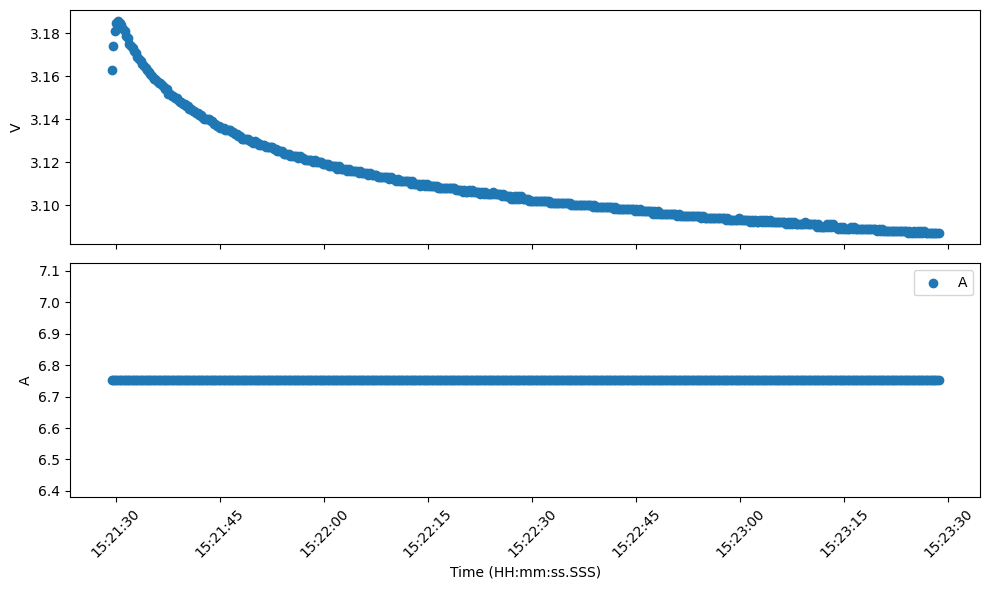

In [7]:
# Define the time range
start_time = pd.to_datetime('15:20:00.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('15:30:00.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

# Further filter the DataFrame to include only rows where 'A' is 6.752
filtered_df = filtered_df[filtered_df['A'] == 6.752]

# Plot the filtered data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.scatter(filtered_df['Time (HH:mm:ss.SSS)'], filtered_df['V'])
ax1.set_ylabel('V')

ax2.scatter(filtered_df['Time (HH:mm:ss.SSS)'], filtered_df['A'])
ax2.set_ylabel('A')
ax2.legend(['A'])

plt.xlabel('Time (HH:mm:ss.SSS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting model for Charging Cycle 1 with 510 data points.


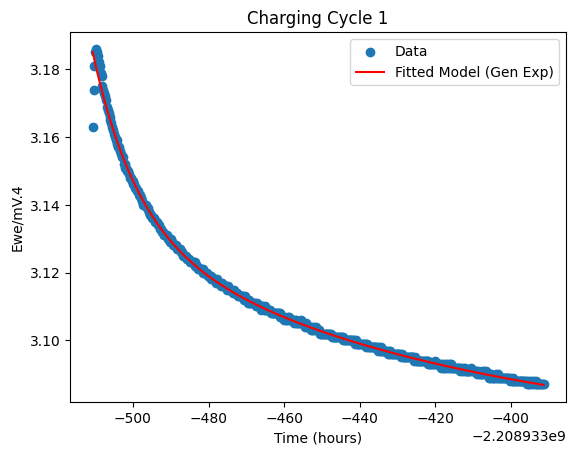

c1 = -1.7675
c2 = 0.0130
c3 = 2.9891
b2 = 1.4308
b3 = 0.3961
Cost for Charging Cycle 1: 1.7317401057066476e-06


In [16]:
# Fit the model to the data
times = pd.to_datetime(filtered_df['Time (HH:mm:ss.SSS)']).astype(int) / 10**9  # Convert time to seconds since epoch
values = filtered_df['V'].values  # Assuming 'V' is the dependent variable

# Fit and plot the cycle
idx = 0
n_terms = 2  # Set the number of exponential terms
times, values, y_fitted, fitted_params, success = fit_and_plot_cycle(times, values, idx, n_terms)


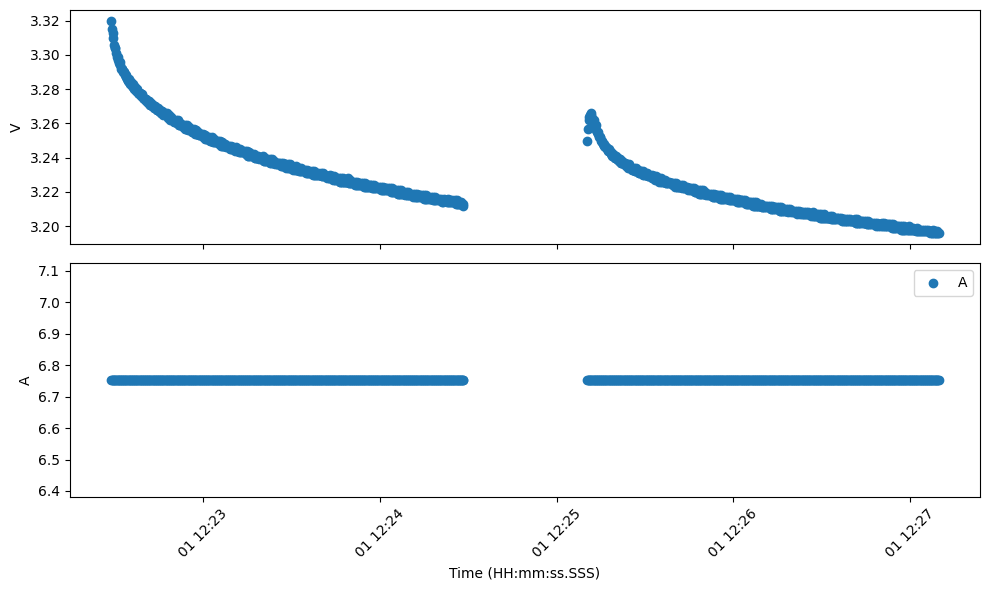

In [ ]:
# Define the time range
start_time = pd.to_datetime('12:10:00.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('12:30:00.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df1 = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

# Further filter the DataFrame to include only rows where 'A' is 6.752
filtered_df1 = filtered_df1[filtered_df1['A'] == 6.752]

# Plot the filtered data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.scatter(filtered_df1['Time (HH:mm:ss.SSS)'], filtered_df1['V'])
ax1.set_ylabel('V')

ax2.scatter(filtered_df1['Time (HH:mm:ss.SSS)'], filtered_df1['A'])
ax2.set_ylabel('A')
ax2.legend(['A'])

plt.xlabel('Time (HH:mm:ss.SSS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# # Sort the filtered DataFrame by the column 'A'
# sorted_filtered_df = filtered_df.sort_values(by='A')

# # Display the first 5 rows of the sorted DataFrame
# print(sorted_filtered_df.head())